In [2]:
import qiskit
import numpy as np
import sys
sys.path.insert(0, '..')
import qsee.random_circuit
import qsee.constant
import qsee.dag
import qsee.qsp
import qsee.qcompilation
import qsee.core.state
import qsee.evolution.predictor
%load_ext autoreload
%autoreload 2

In [14]:
num_qubits = 3
depth = 3
circuit = qsee.random_circuit.generate_with_pool(num_qubits, depth)
matrix = (qsee.dag.circuit_to_adjacency_matrix(circuit))
print(matrix)
print(np.count_nonzero(matrix))

[[0.     0.     0.     0.     1.2726 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     2.     0.     0.     0.    ]
 [0.     0.     0.     2.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     1.2747 0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     2.    ]
 [0.     0.     0.     0.     0.     0.     0.     1.2709 0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.    ]]
6


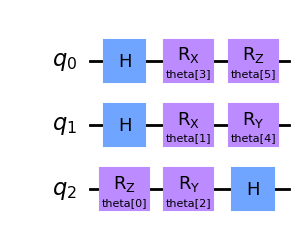

In [15]:
circuit.draw('mpl')

In [78]:


def compilation_fitness_w(qc: qiskit.QuantumCircuit, num_steps=50):
    """3 qubits => depth 8

    Args:
        qc (qiskit.QuantumCircuit): _description_
        num_steps (int, optional): _description_. Defaults to 5.

    Returns:
        _type_: _description_
    """
    compiler = qsee.qcompilation.QuantumCompilation(
        u=qc,
        vdagger=qsee.core.state.create_w_state(num_qubits).inverse(),
        optimizer='adam',
        loss_func='loss_fubini_study'
    )
    compiler.fit(num_steps=num_steps, verbose=0)
    return np.average(compiler.loss_values)
n_item = 100
num_qubits = 2
depth = 4
circuits = []
xs = []
ys = []
for i in range(0, n_item):
    print(i)
    circuit = qsee.random_circuit.generate_with_pool(num_qubits, depth)
    circuits.append(circuit)
    xs.append(qsee.dag.circuit_to_adjacency_matrix(circuit))
    ys.append(compilation_fitness_w(circuit))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [136]:
def tao_label(gia_tri):
    if gia_tri > 0 and gia_tri <= 0.25:
        return 0
    elif gia_tri > 0.25 and gia_tri <= 0.5:
        return 1
    elif gia_tri > 0.5 and gia_tri <= 0.75:
        return 2
    elif gia_tri > 0.75:
        return 3
# Tạo list label dựa trên list số thực
new_ys = [tao_label(y) for y in ys]

In [1]:
np.mean(ys)

NameError: name 'np' is not defined

In [139]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(ys, shade=True, color='b', label='y train1')
sns.kdeplot(new_ys, shade=True, color='r', label='y train')
sns.kdeplot(labels, shade=True, color='g', label='y predict')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE Plot of Two Subarrays')
plt.legend()
plt.show()


/var/folders/bw/2cm4rnhn0djgg95n4py1pysc0000gp/T/ipykernel_63058/1377362022.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ys, shade=True, color='b', label='y train1')
/var/folders/bw/2cm4rnhn0djgg95n4py1pysc0000gp/T/ipykernel_63058/1377362022.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_ys, shade=True, color='r', label='y train')
/var/folders/bw/2cm4rnhn0djgg95n4py1pysc0000gp/T/ipykernel_63058/1377362022.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(labels, shade=True, color='g', label='y predict')


In [86]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(ys, shade=True, color='r', label='y train')
sns.kdeplot(predictor.predict_x(circuits), shade=True, color='y', label='y predict')
# Add labels and a legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE Plot of Two Subarrays')
plt.legend()

plt.show()


4/4 [==============================] - 0s 2ms/step


/var/folders/bw/2cm4rnhn0djgg95n4py1pysc0000gp/T/ipykernel_63058/749985227.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ys, shade=True, color='r', label='y train')
/var/folders/bw/2cm4rnhn0djgg95n4py1pysc0000gp/T/ipykernel_63058/749985227.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predictor.predict_x(circuits), shade=True, color='y', label='y predict')


In [138]:
params = {
    'rate_train': 0.6,
    'rate_val': 0.2,
    'rate_test': 0.2
}
predictor = qsee.evolution.predictor.Predictor(params, circuits, new_ys.copy())
predictor.augumented_data(900, 0.01)
predictor.prepare_dataset()
predictor.fit()
predictor.plot()

100
Epoch 1/100
60/60 [==============================] - 0s 2ms/step - loss: 1.6458 - accuracy: 0.2333 - val_loss: 1.3438 - val_accuracy: 0.3500
Epoch 2/100
60/60 [==============================] - 0s 741us/step - loss: 1.4871 - accuracy: 0.2667 - val_loss: 1.2833 - val_accuracy: 0.4500
Epoch 3/100
60/60 [==============================] - 0s 681us/step - loss: 1.4622 - accuracy: 0.2667 - val_loss: 1.2707 - val_accuracy: 0.5000
Epoch 4/100
60/60 [==============================] - 0s 684us/step - loss: 1.3807 - accuracy: 0.2500 - val_loss: 1.2678 - val_accuracy: 0.5500
Epoch 5/100
60/60 [==============================] - 0s 660us/step - loss: 1.3040 - accuracy: 0.3333 - val_loss: 1.2611 - val_accuracy: 0.5000
Epoch 6/100
60/60 [==============================] - 0s 638us/step - loss: 1.2850 - accuracy: 0.3500 - val_loss: 1.2567 - val_accuracy: 0.4000
Epoch 7/100
60/60 [==============================] - 0s 640us/step - loss: 1.2463 - accuracy: 0.4167 - val_loss: 1.2574 - val_accuracy: 0.40

In [107]:
k = predictor.predict_x(circuits)
labels = []
for i in k:
    labels.append(np.argmax(i))
print(labels)

4/4 [==============================] - 0s 585us/step
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0]


In [117]:
import collections, numpy
counter = collections.Counter(new_ys)
print(counter)

Counter({0: 39, 1: 27, 2: 26, 3: 8})


In [109]:
count = 0
for i in range(0, len(new_ys)):
    if new_ys[i] == labels[i]:
        count += 1
print(count/len(new_ys))

0.57


In [61]:
# Evaluate the model
evaluation = model.evaluate(test_data, test_labels, verbose=0)

# Calculate additional metrics (e.g., MAE)
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Make predictions on the test data
predictions = model.predict(test_data)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_labels, predictions)
mape = mean_absolute_percentage_error(test_labels, predictions)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Error (MAPE): {mape}')
print(evaluation)

NameError: name 'model' is not defined

In [120]:
import numpy as np

# Sample 8x8 matrix dataset (replace this with your own dataset)
original_data = np.random.rand(2, 2)  # Example random data


# Print the original and augmented data
print("Original Data:")
print(original_data)

print("\nAugmented Data:")
for i, augmented_sample in enumerate(augmented_data):
    print(f"Augmented Sample {i + 1}:")
    print(augmented_sample)
    print("\n")


Original Data:
[[0.75825646 0.75107895]
 [0.51147157 0.16361957]]

Augmented Data:
Augmented Sample 1:
[[0.76913413 0.75781818]
 [0.50156986 0.16764626]]


Augmented Sample 2:
[[0.73293069 0.77217121]
 [0.5280901  0.1645514 ]]


Augmented Sample 3:
[[0.74020791 0.74352213]
 [0.49745135 0.15979938]]


Augmented Sample 4:
[[0.76957382 0.74581921]
 [0.50271083 0.16587782]]


Augmented Sample 5:
[[0.75867118 0.75632858]
 [0.51383294 0.15499959]]


Augmented Sample 6:
[[0.77730649 0.75426454]
 [0.53438687 0.16195128]]


Augmented Sample 7:
[[0.75989298 0.73548764]
 [0.49691919 0.16516378]]


Augmented Sample 8:
[[0.76996995 0.76670319]
 [0.51003059 0.17136385]]


Augmented Sample 9:
[[0.76242767 0.73118967]
 [0.51831228 0.16298728]]


Augmented Sample 10:
[[0.76100831 0.76783104]
 [0.52427616 0.15918477]]




In [248]:
model.save("model.keras")
loaded_model = tf.keras.models.load_model("model.keras")
print(np.allclose(model.predict(test_data), loaded_model.predict(test_data)))

1/1 [==============================] - 0s 34ms/step
True
